<a href="https://colab.research.google.com/github/Maisho20/Machine-Learning/blob/main/Week%2011/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Sabbaha Naufal Erwanda**

**Kelas: TI-3A**

**NIM: 2141720221**

# Minggu 11
Job Sheet 11: Convolutional Neural Network (CNN)

## Praktikum 1
Klasifikasi 🐱 dan 🐶

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Langkah 1 - Import Library**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### **Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

- Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Mechine learning/Week 11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


- Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Mechine learning/Week 11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


### **Langkah 3 - Pembuatan Model CNN**
- Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

- Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

- Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

- Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

- Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

- Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

- Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

- Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
32/32 [==============================] - 302s 9s/step - loss: 0.7272 - accuracy: 0.4810 - val_loss: 0.6855 - val_accuracy: 0.5150
Epoch 2/25
32/32 [==============================] - 6s 198ms/step - loss: 0.6825 - accuracy: 0.5720 - val_loss: 0.6760 - val_accuracy: 0.5380
Epoch 3/25
32/32 [==============================] - 9s 297ms/step - loss: 0.6821 - accuracy: 0.5340 - val_loss: 0.6715 - val_accuracy: 0.5970
Epoch 4/25
32/32 [==============================] - 6s 192ms/step - loss: 0.6785 - accuracy: 0.5500 - val_loss: 0.6803 - val_accuracy: 0.5720
Epoch 5/25
32/32 [==============================] - 7s 216ms/step - loss: 0.6572 - accuracy: 0.5780 - val_loss: 0.6710 - val_accuracy: 0.5820
Epoch 6/25
32/32 [==============================] - 6s 200ms/step - loss: 0.6447 - accuracy: 0.6300 - val_loss: 0.6396 - val_accuracy: 0.6320
Epoch 7/25
32/32 [==============================] - 6s 194ms/step - loss: 0.6237 - accuracy: 0.6340 - val_loss: 0.6304 - val_accuracy: 0.6560
Epoch 8

### Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Mechine learning/Week 11/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 203ms/step


## Praktikum 2
Klasifikasi Multi-label dengan Data CIFAT

### Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


### Langkah 3 - Verifikasi Data

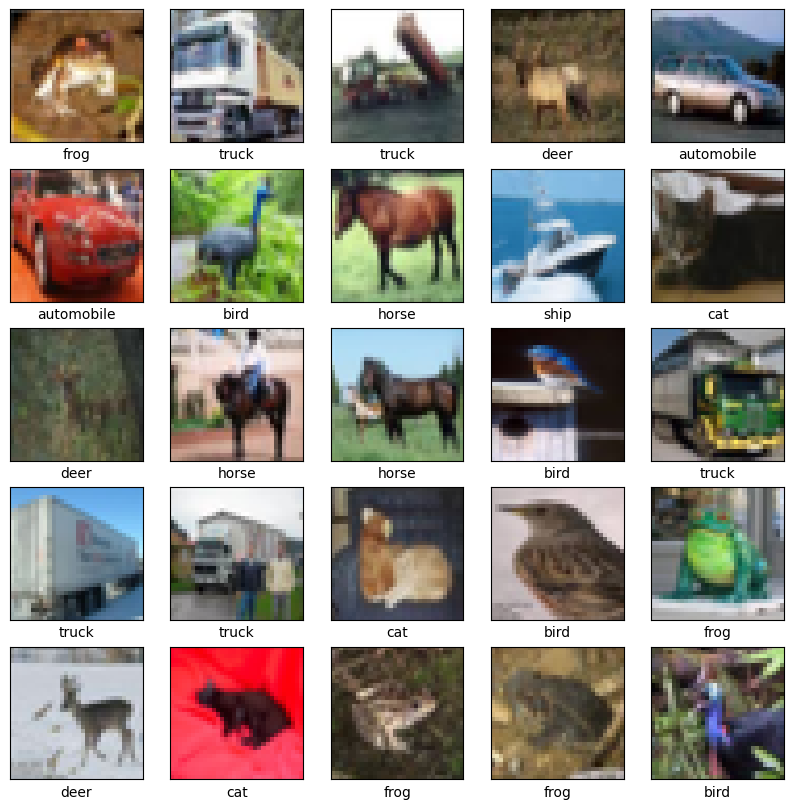

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN
- Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

- Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

- Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

- Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

- Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4936 - accuracy: 0.4570 - val_loss: 1.2079 - val_accuracy: 0.5696
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1166 - accuracy: 0.6049 - val_loss: 1.0349 - val_accuracy: 0.6372
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9724 - accuracy: 0.6572 - val_loss: 1.0424 - val_accuracy: 0.6328
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8812 - accuracy: 0.6914 - val_loss: 0.9259 - val_accuracy: 0.6788
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8108 - accuracy: 0.7132 - val_loss: 0.8899 - val_accuracy: 0.6925
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7570 - accuracy: 0.7347 - val_loss: 0.8841 - val_accuracy: 0.6963
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7108 - accuracy: 0.7494 - val_loss: 0.8510 - val_accuracy

### Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8609 - accuracy: 0.7136 - 695ms/epoch - 2ms/step


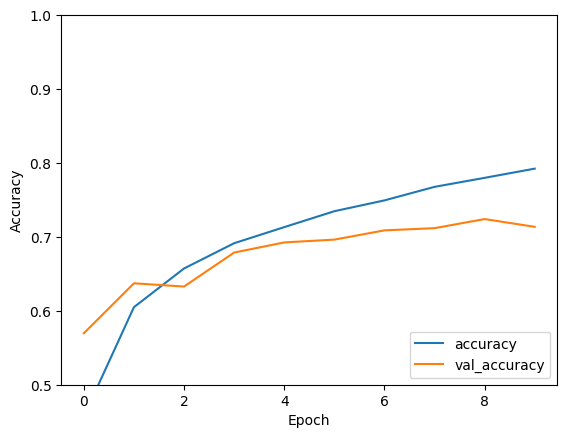

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7135999798774719


## Tugas


### Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with data augmentation
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6697 - accuracy: 0.3805 - val_loss: 1.3453 - val_accuracy: 0.5126
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2959 - accuracy: 0.5366 - val_loss: 1.1189 - val_accuracy: 0.5963
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1357 - accuracy: 0.6001 - val_loss: 1.0265 - val_accuracy: 0.6379
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0278 - accuracy: 0.6428 - val_loss: 0.9719 - val_accuracy: 0.6606
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9521 - accuracy: 0.6683 - val_loss: 1.0257 - val_accuracy: 0.6408
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8976 - accuracy: 0.6879 - val_loss: 0.8796 - val_accuracy: 0.6958
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8464 - accuracy: 0.7078 - val_loss: 0.8686 - val_accuracy

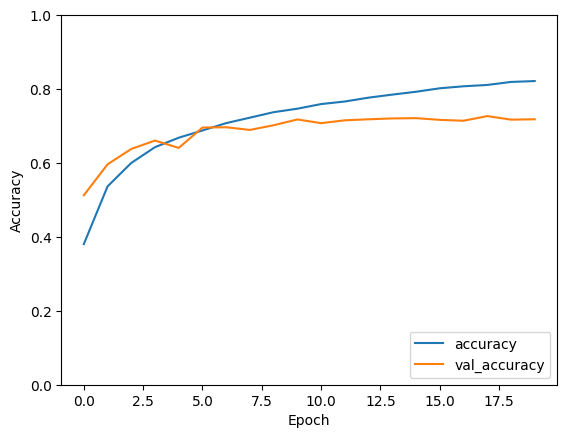

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.9441 - accuracy: 0.7182 - 717ms/epoch - 2ms/step
Test accuracy: 0.7182000279426575


### Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.2140 - accuracy: 0.9324 - val_loss: 0.0890 - val_accuracy: 0.9709
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0558 - val_accuracy: 0.9837
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0407 - val_accuracy: 0.9886
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.0519 - val_accuracy: 0.9856
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0444 - val_accuracy: 0.9865
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0384 - val_accuracy: 0.9891
Epoch 

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.0301 - accuracy: 0.9910 - 884ms/epoch - 3ms/step
Test accuracy: 0.9909999966621399


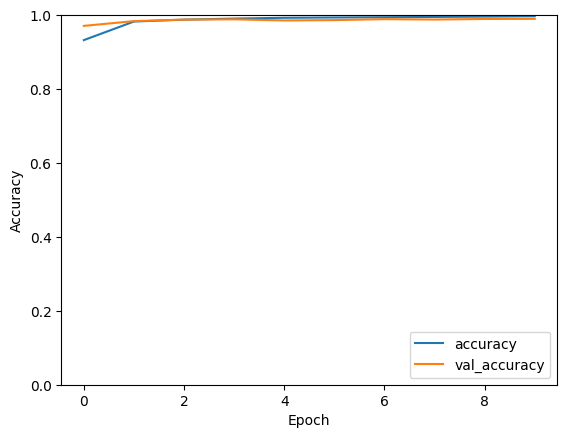

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
